In [2]:
#Importing packages
import numpy
import pandas 
import matplotlib.pyplot as plt
from IPython.display import display
import os
import math

In [4]:
# Setting directory, reading the data, Military Expenditure and GDP_proportion
print(os.getcwd())
os.chdir("C:\\Users\\Priyanka Balineni\\Desktop\\Fall 2017\\Data Mining\\DataMining Project")
military_expenditure = pandas.read_csv('Military Expenditure.csv',header=0)
GDP_prop = pandas.read_csv('GDP.csv')
print(military_expenditure)
print(GDP_prop)

C:\Users\Priyanka Balineni\Documents
         Country    2012    2013    2014    2015    2016
0            USA  706918  650851  610636  596010  606233
1          China  169382  185152  200915  214093  225713
2         Russia   54832   57500   61622   66419   70345
3   Saudi Arabia   61352   70313   82527   87186   61358
4         France   52551   52419   53195   55342   55681
5          India   48804   48445   50813   51295   55631
6             UK   58896   56408   54938   53862   54217
7          Japan   41114   40940   41159   41103   41569
8        Germany   41180   38803   38628   39813   40985
9    South Korea   32876   33912   34954   36433   37265
10         Italy   29554   28388   26402   25295   27966
11     Australia   20275   20099   21814   24040   24371
12        Brazil   24574   24708   25201   24618   22839
13        Israel   14827   15654   16565   16764   17800
14        Canada   16619   15362   15613   15317   15505
         Country      2012      2013      2014     

In [5]:
# Calculation GDP values:
# GDP= military expenditure/GDP_prop
GDP_data = GDP_prop
for i in range(5):
    GDP_data['201'+str(i+2)] = military_expenditure['201'+str(i+2)]/GDP_prop['201'+str(i+2)]
GDP_data  

,Country,2012,2013,2014,2015,2016
0,USA,1.667758e+07,1.698235e+07,1.741369e+07,1.803671e+07,1.841146e+07
1,China,9.116871e+06,9.797345e+06,1.043802e+07,1.104836e+07,1.168328e+07
2,Russia,1.373182e+06,1.369264e+06,1.362630e+06,1.354771e+06,1.323012e+06
3,Saudi Arabia,7.970139e+05,7.809086e+05,7.703027e+05,6.460037e+05,5.892139e+05
4,France,2.347123e+06,2.359599e+06,2.375779e+06,2.418913e+06,2.449958e+06
5,India,1.924845e+06,1.966018e+06,2.042194e+06,2.116219e+06,2.225377e+06
6,UK,2.632843e+06,2.656800e+06,2.738344e+06,2.847760e+06,2.917210e+06
7,Japan,4.079420e+06,4.128038e+06,4.076939e+06,4.147501e+06,4.203302e+06
8,Germany,3.130969e+06,3.151396e+06,3.227938e+06,3.352623e+06,3.442574e+06
9,South Korea,1.258182e+06,1.288806e+06,1.323057e+06,1.377885e+06,1.404508e+06


In [6]:
#Assigning all values in military expenditure to integers
military_expenditure.loc[:,'2012':'2016'] = military_expenditure.loc[:,'2012':'2016'].astype(int)
#pandas.options.display.float_format = '{:,.5f}'.format
GDP_data.loc[:,'2012':'2016'] = GDP_data.loc[:,'2012':'2016'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



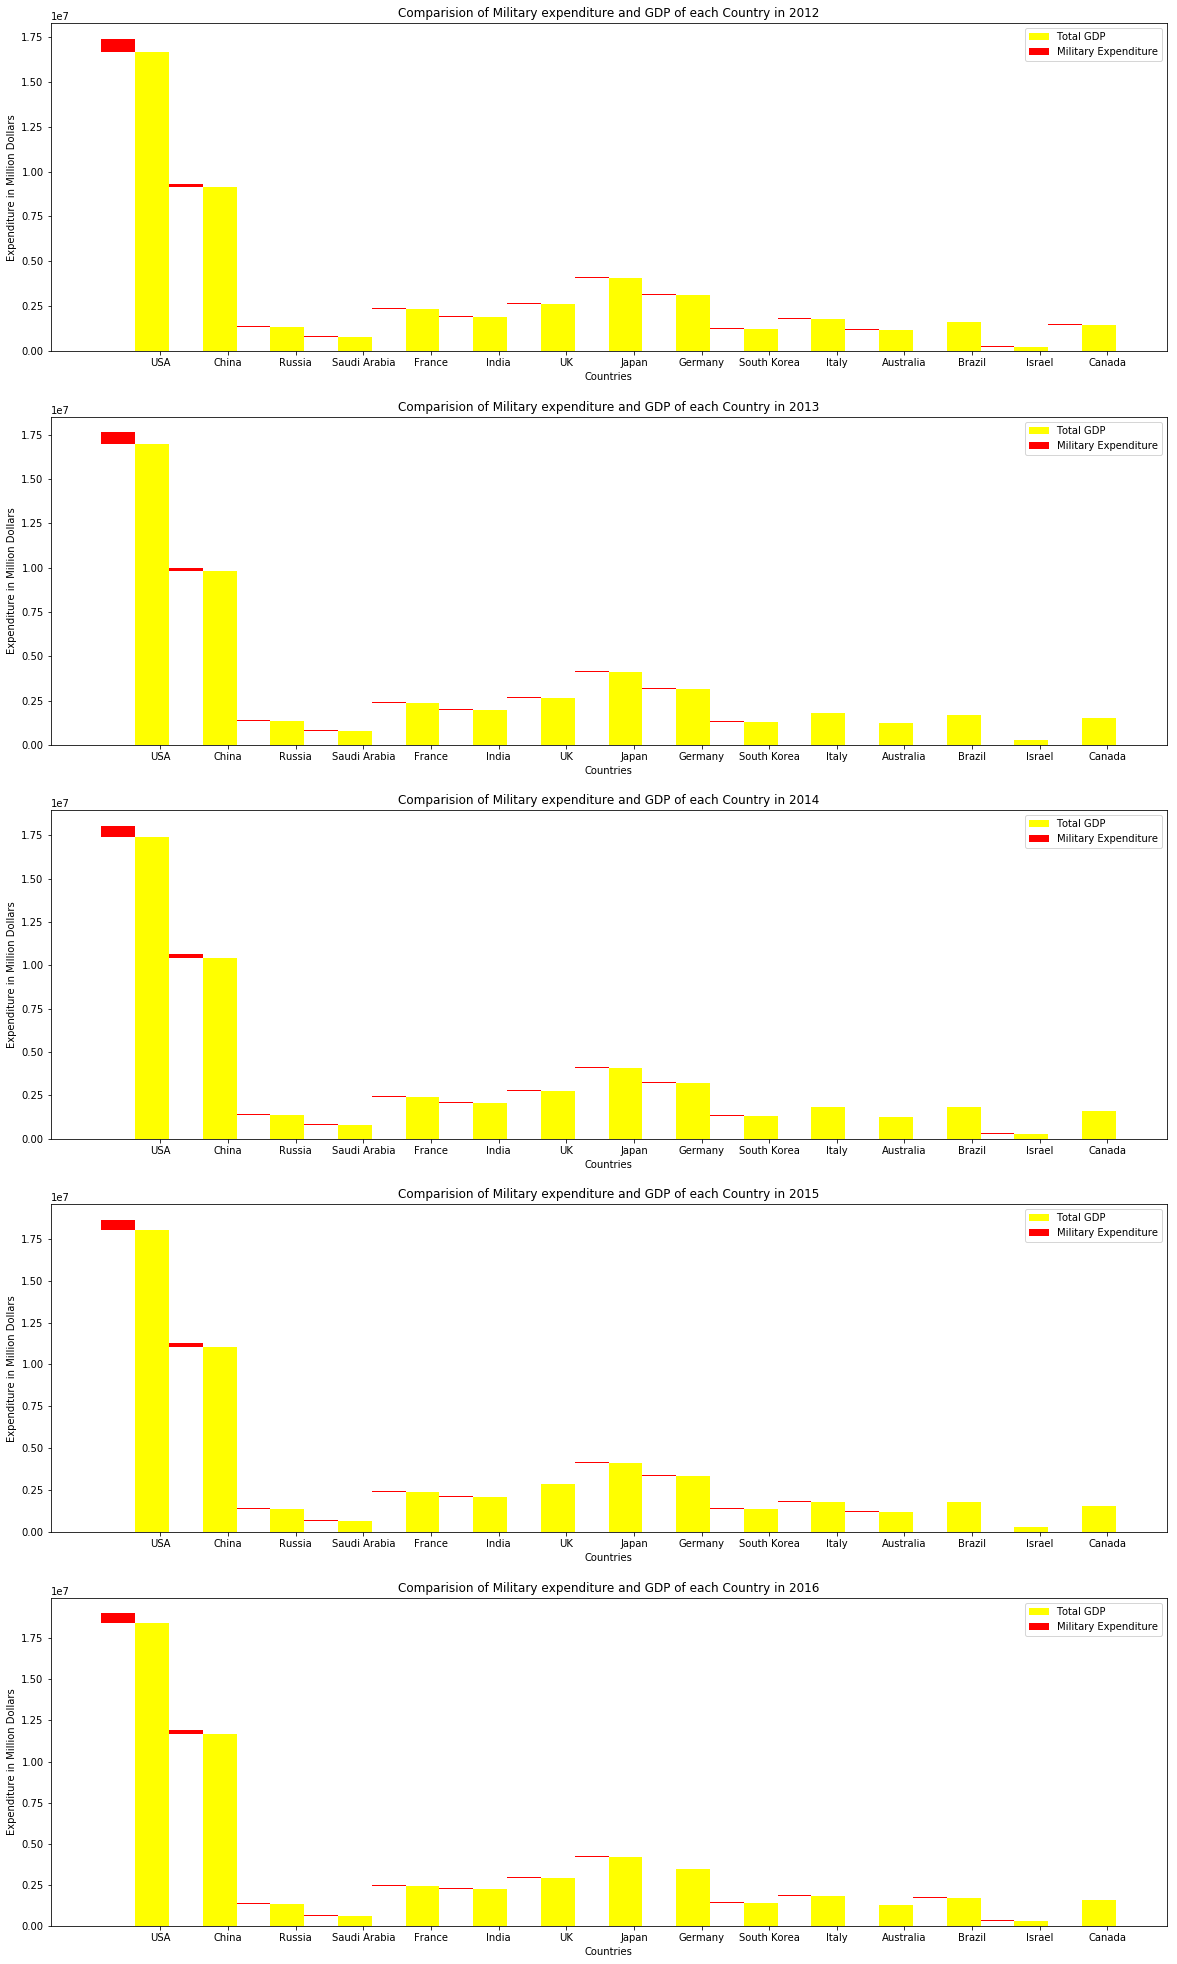

In [7]:
#Comparing the military expenditure and GDP by bar charts using matplotlib
%matplotlib inline
f, ax = plt.subplots(5,figsize=(20,35))
for i in range(5):
    bar_width = 0.5
    x= numpy.arange(15)
    ax[i].bar(x,GDP_data['201'+str(i+2)] , bar_width, color="yellow",label='Total GDP')
    ax[i].bar(x-bar_width,military_expenditure['201'+str(i+2)] , bar_width, color="red",bottom = GDP_data['201'+str(i+2)],label='Military Expenditure')
    ax[i].set_xticks(x + bar_width/4)
    ax[i].set_xticklabels(military_expenditure['Country'])
    ax[i].set_title('Comparision of Military expenditure and GDP of each Country in 201'+str(i+2))
    ax[i].set_ylabel('Expenditure in Million Dollars')
    ax[i].set_xlabel('Countries')
    ax[i].legend()
f.show()

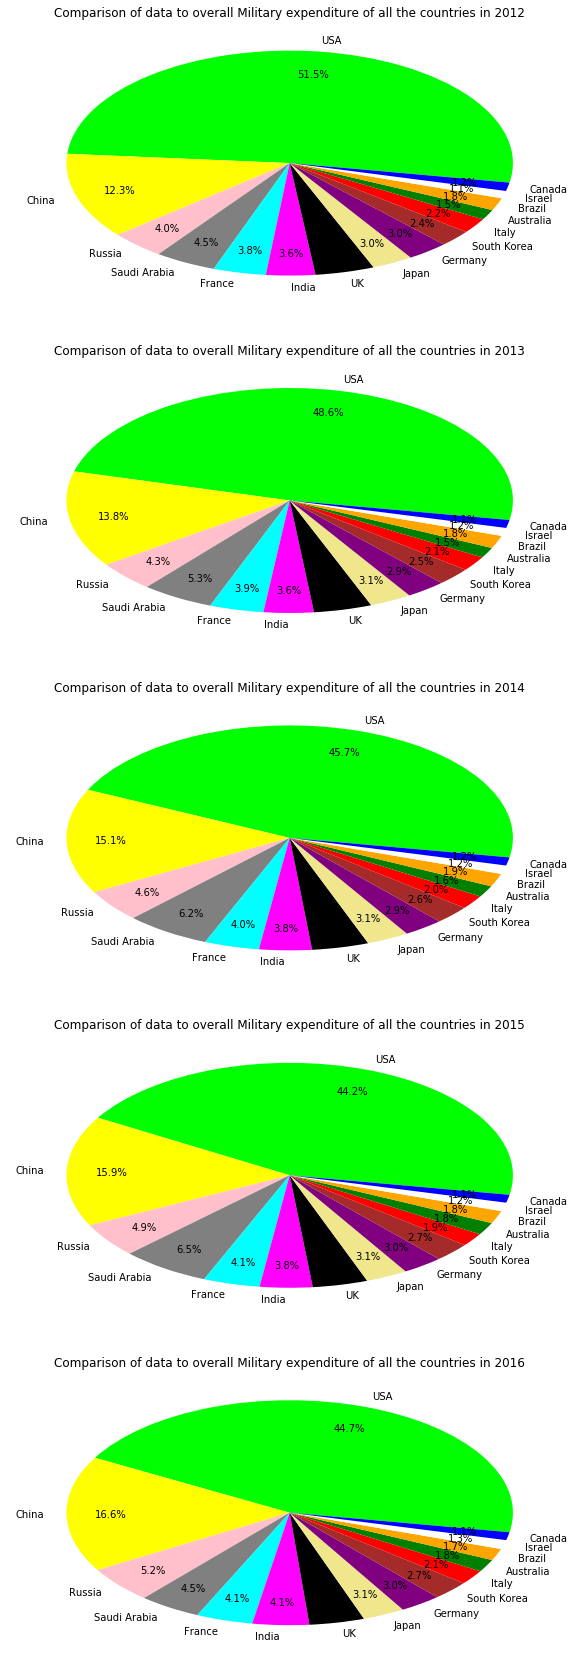

In [8]:
#Comparing the data to overall military spending of all the countries using pie charts
%matplotlib inline 
labels = military_expenditure['Country']
colors = ['lime', 'yellow', 'pink', 'grey', 'cyan', 'magenta','black','khaki','purple',
          'brown','red','green','orange','white','blue']
f, ax = plt.subplots(5,1,figsize=(10,30))
for i in range(5):
    ax[i].pie(military_expenditure['201'+str(i+2)], labels= labels, autopct='%1.1f%%',colors=colors,
              pctdistance=0.8, startangle=-10)
    ax[i].set_title('Comparison of data to overall Military expenditure of all the countries in 201'+str(i+2))
plt.show()

In [9]:
#Calculating the values of per person military spending(mil_exp_pp) and per person GDP(gdp_pp)
import copy
population  = pandas.read_csv('Population.csv',header=0)
population.loc[:,'2012':'2016'] = population.loc[:,'2012':'2016'].astype(int)
mil_exp_pp = copy.copy(GDP_data)
gdp_pp = copy.copy(GDP_data)

for i in range(5):
    mil_exp_pp['201'+str(i+2)] = military_expenditure['201'+str(i+2)]/population['201'+str(i+2)]
    gdp_pp['201'+str(i+2)] = GDP_data['201'+str(i+2)]/population['201'+str(i+2)]

print(mil_exp_pp)
print(gdp_pp)

         Country      2012      2013      2014      2015      2016
0            USA  0.002252  0.002034  0.001916  0.001833  0.001876
1          China  0.000126  0.000134  0.000145  0.000153  0.000161
2         Russia  0.000397  0.000403  0.000426  0.000467  0.000489
3   Saudi Arabia  0.002312  0.002439  0.002682  0.002916  0.001901
4         France  0.000801  0.000815  0.000808  0.000852  0.000860
5          India  0.000040  0.000039  0.000040  0.000040  0.000042
6             UK  0.000934  0.000893  0.000857  0.000844  0.000824
7          Japan  0.000323  0.000322  0.000324  0.000324  0.000325
8        Germany  0.000506  0.000469  0.000467  0.000482  0.000500
9   South Korea   0.000673  0.000688  0.000693  0.000732  0.000734
10         Italy  0.000482  0.000465  0.000442  0.000414  0.000471
11     Australia  0.000921  0.000861  0.000929  0.001005  0.001010
12        Brazil  0.000119  0.000123  0.000130  0.000121  0.000110
13        Israel  0.001953  0.001998  0.002050  0.002009  0.00

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



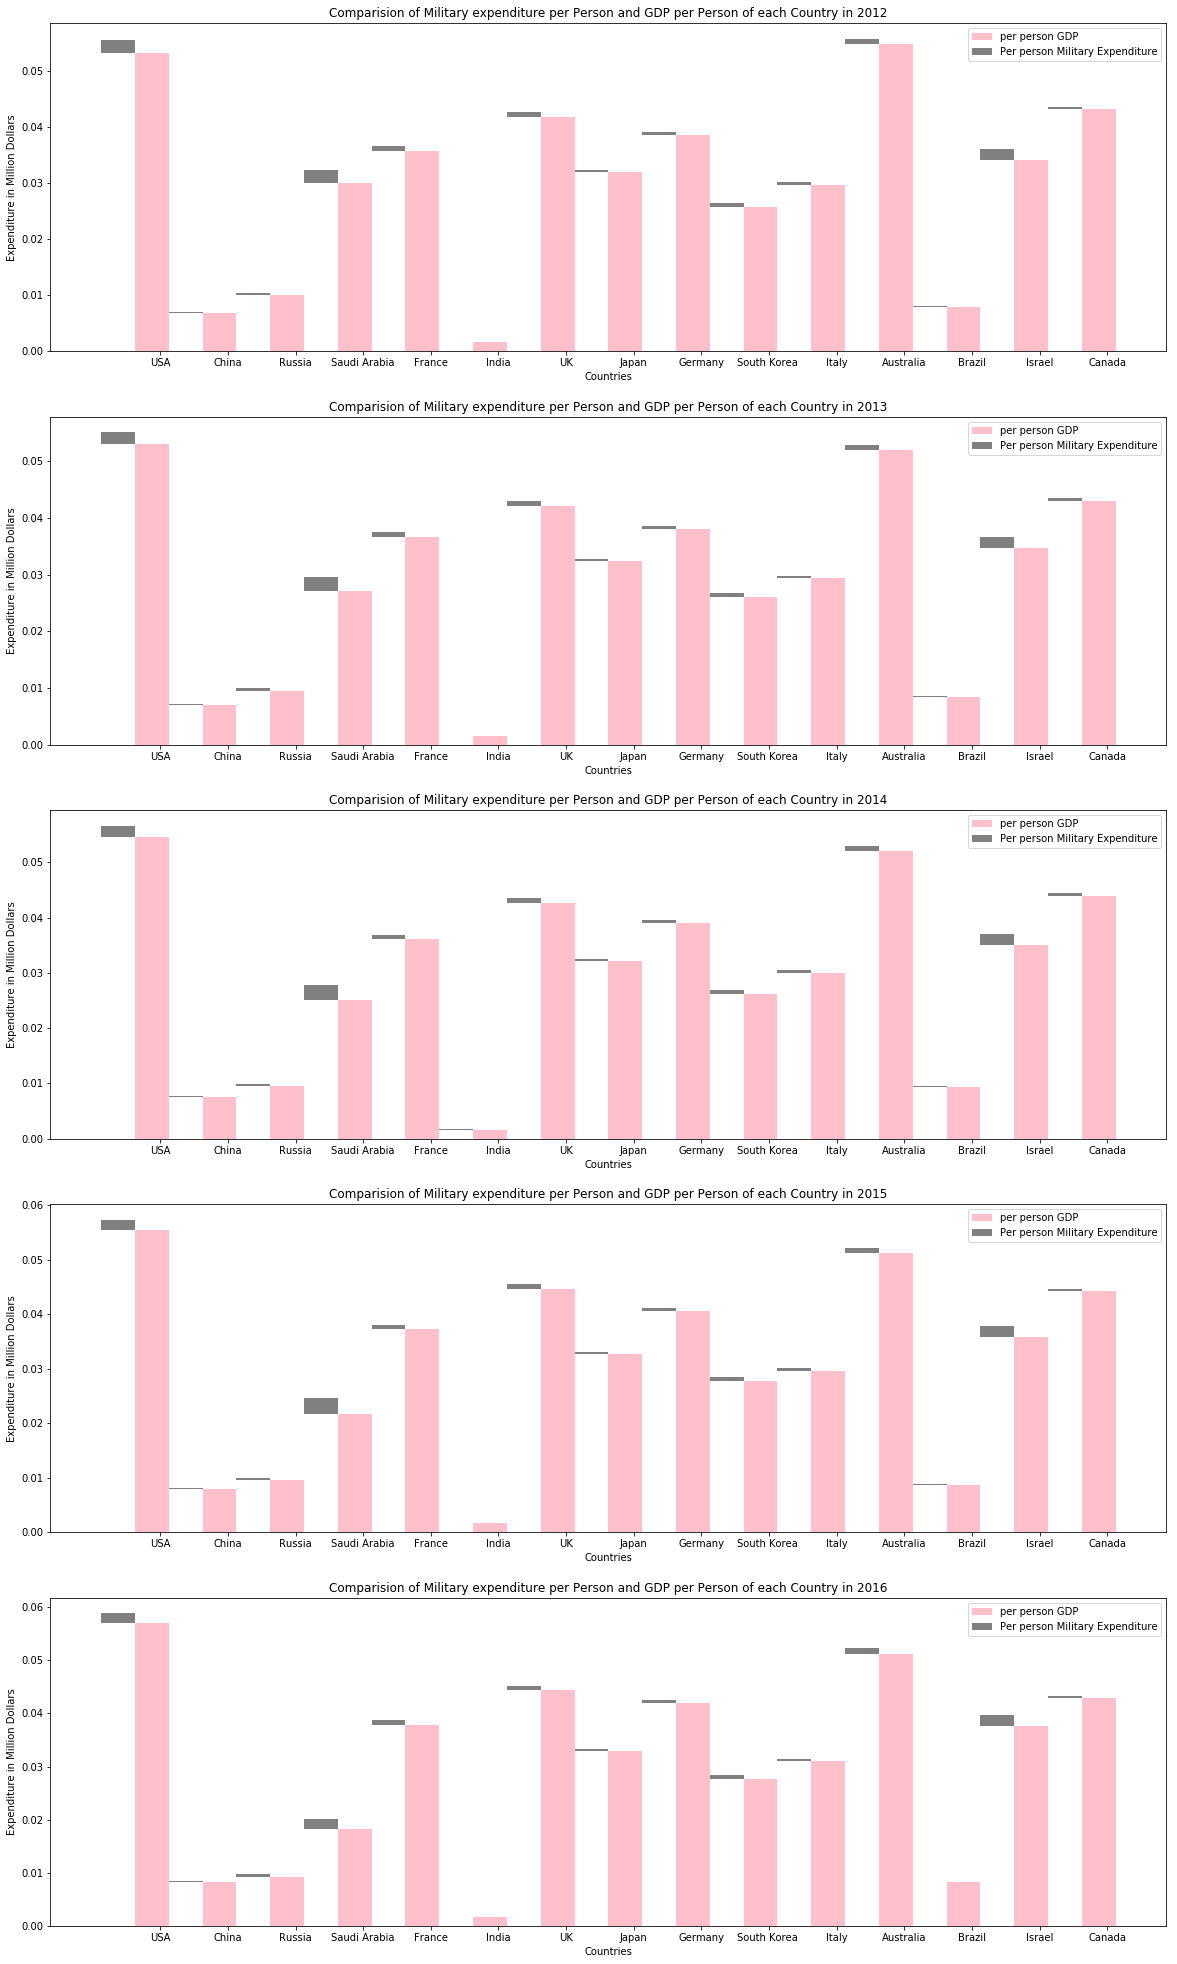

In [10]:
#Comparing the military spending  per person to GDP per person
%matplotlib inline
f, ax = plt.subplots(5,figsize=(20,35))
for i in range(5):
    bar_width = 0.5
    x= numpy.arange(15)
    ax[i].bar(x,gdp_pp['201'+str(i+2)] , bar_width, color="pink",label='per person GDP')
    ax[i].bar(x-bar_width,mil_exp_pp['201'+str(i+2)] , bar_width, color="grey",bottom = gdp_pp['201'+str(i+2)],label='Per person Military Expenditure')
    ax[i].set_xticks(x + bar_width/4)
    ax[i].set_xticklabels(mil_exp_pp['Country'])
    ax[i].set_title('Comparision of Military expenditure per Person and GDP per Person of each Country in 201'+str(i+2))
    ax[i].set_ylabel('Expenditure in Million Dollars')
    ax[i].set_xlabel('Countries')
    ax[i].legend()
f.show()

In [11]:
#Calculating change in values(cv)
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
list_cv=[]
for i in range(15):
    lm.fit(numpy.array(range(2012,2017)).reshape(-1,1),numpy.array(military_expenditure.ix[i,1:6]).reshape(-1,1))
    list_cv.append(lm.coef_)
list_cv = [l[0] for l in list_cv]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [12]:
#Calculating change in percentage(pc) and printing change in percentage and change in value
list_pc=[]
for i in range(15):
    lm.fit(numpy.array(range(2012,2017)).reshape(-1,1),numpy.array(military_expenditure.ix[i,1:6]).reshape(-1,1))
    list_pc.append((lm.coef_)*5*100/(military_expenditure.ix[i,1]))

list_pc = [l[0] for l in list_pc]
list_countries = [l for l in military_expenditure['Country']]

military_new = pandas.DataFrame({'Country':list_countries, 'Change in Percentage':list_pc,'Change in value':list_cv})
print(military_new)
    

   Change in Percentage Change in value       Country
0      [-18.1216916248]      [-25621.1]           USA
1       [41.7998960929]       [14160.3]         China
2       [36.4248978699]        [3994.5]        Russia
3       [13.7607575955]        [1688.5]  Saudi Arabia
4       [8.73722669407]         [918.3]        France
5        [16.908450127]        [1650.4]         India
6      [-10.1059494703]       [-1190.4]            UK
7       [1.30490830374]         [107.3]         Japan
8      [0.752792617776]          [62.0]       Germany
9       [17.1842681591]        [1129.9]   South Korea
10     [-10.6060093388]        [-626.9]         Italy
11      [29.9210850801]        [1213.3]     Australia
12     [-7.24342801335]        [-356.0]        Brazil
13      [23.7944290821]         [705.6]        Israel
14     [-6.83855827667]        [-227.3]        Canada


In [13]:
#Printing Growing countries. 
#Sorted the values using change in value 
Growing_countries = military_new.loc[military_new['Change in value'] > 1000]
Growing_countries['Codes']=['CHN','RUS','SAU','IND','PRK','AUS']
Growing_countries[['Country','Codes','Change in Percentage','Change in value']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country,Codes,Change in Percentage,Change in value
1,China,CHN,[41.7998960929],[14160.3]
2,Russia,RUS,[36.4248978699],[3994.5]
3,Saudi Arabia,SAU,[13.7607575955],[1688.5]
5,India,IND,[16.908450127],[1650.4]
9,South Korea,PRK,[17.1842681591],[1129.9]
11,Australia,AUS,[29.9210850801],[1213.3]


In [14]:
#Using plotly for plotting graphs
from plotly.graph_objs import Scatter, Figure, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot as py
init_notebook_mode(connected=True)
data = [ dict(
        type = 'choropleth',
        locations = Growing_countries['Codes'],
        z = Growing_countries['Change in value'],
        text = Growing_countries['Country'],
        colorscale = [[0,"rgb(5,10,172)"],[0.35,"rgb(40,60,190)"],[0.5,"rgb(70,100,254)"],\
            [0.6,"rgb(90,120,245)"],[0.7,"rgb(106,137,247)"],[1,"rgb(220,220,220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(240,240,240)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Change of GDP<br>Billions US$'),
      ) ]
layout = dict(
    title = 'Fastest Growing Countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
         showcountries = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py( fig, validate=False, filename='d3-world-map' )